In [1]:
%matplotlib inline
# packages
import os
from functools import reduce
from psfs import Hamiltonian, En_h, h, c
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
from smtools import sm_sort

In [2]:
# construct matrix
mat0 = Hamiltonian(n_min=1, n_max=4, S=0, MJ=0)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=8, n_max=14, S=0, MJ=0)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 10
Number of basis states: 77


In [3]:
# calculate Stark map
Efield = np.linspace(0, 5000, 300)  # V/cm
sm0 = mat0.stark_map(Efield*1e2)
sm0 = sm_sort(sm0)
sm1 = mat1.stark_map(Efield*1e2)
sm1 = sm_sort(sm1)

diagonalise Hamiltonian: 100%|██████████| 300/300 [00:00<00:00, 1335.33it/s]


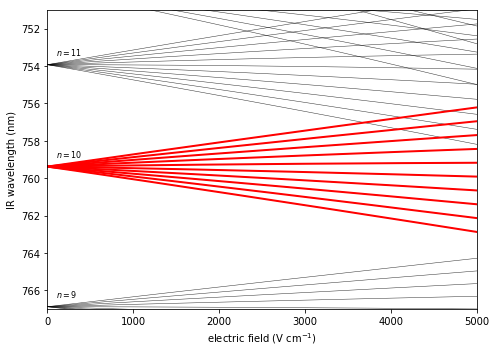

In [4]:
# Rydberg level
fig, ax = plt.subplots(figsize=(7, 5))

# plot
ixes_lower = np.intersect1d(mat0.where('n', 2), mat0.where('l', 1))
lix = ixes_lower[0]
ixes_ryd = range(mat1.num_states)
for ix in ixes_ryd:
    ax.plot(Efield, 1e9*c* h/(sm1[:, ix] - sm0[:, lix]), c='k', ls='-', lw=0.5, alpha=0.8)

ixes_ryd = mat1.where('n', 10)
for ix in ixes_ryd:
    ax.plot(Efield, 1e9*c* h/(sm1[:, ix] - sm0[:, lix]), c='r', ls='-', lw=2, alpha=1)
    
# labels
for n in [9, 10, 11]:
    first_state = mat1.where('n', n)[0]
    en = En_h * (mat1.basis[first_state].E0 - mat0.basis[lix].E0)
    lbl_y = 1e9*c* h / en
    ax.annotate(r'$n=%d$'%n, [100, lbl_y - 0.5], size=8)
    
# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('IR wavelength (nm)')

ax.set_ylim(767, 751)
ax.set_xlim(0, 5000)

# output
plt.tight_layout()
fileout = os.path.join("../images/n10.png")
plt.savefig(fileout, dpi=300)
plt.show()